# Song Popularity Regression Model
# Authors: 

**Original Dataset Source: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset**

# Dataset Description

**Attributes in the dataset:**

1. acousticness: A confidence measure from 0.0 to 1.0 of how acoustic the track is
2. danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity
3. duration_ms: Song duration in ms
4. energy: represents a perceptual measure of intensity and activity
5. instrumentalness: predicts whether a track contains no vocals (1.0 means the song has no vocal content)
6. key: the key the song is in
7. liveness: detects the presence of a live audience in the recording
8. loudness: overall average loudness of the song in decibels
9. mode: the modality of the song's scale; 2 categories; major is represented by "1" and minor by "0"
10. speechiness: the presence of spoken words in a song
11. tempo: overall estimated tempo of a track in beats per minute
12. time_signature: estimated time signature of the song

In [324]:
# Libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the data and viewing data info

In [325]:
#load data from public url
url = "https://raw.githubusercontent.com/mahnsi/group22finalproject/main/song_data.csv"
songs = pd.read_csv(url, sep=',')

In [326]:
# View attributes, size, type information
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


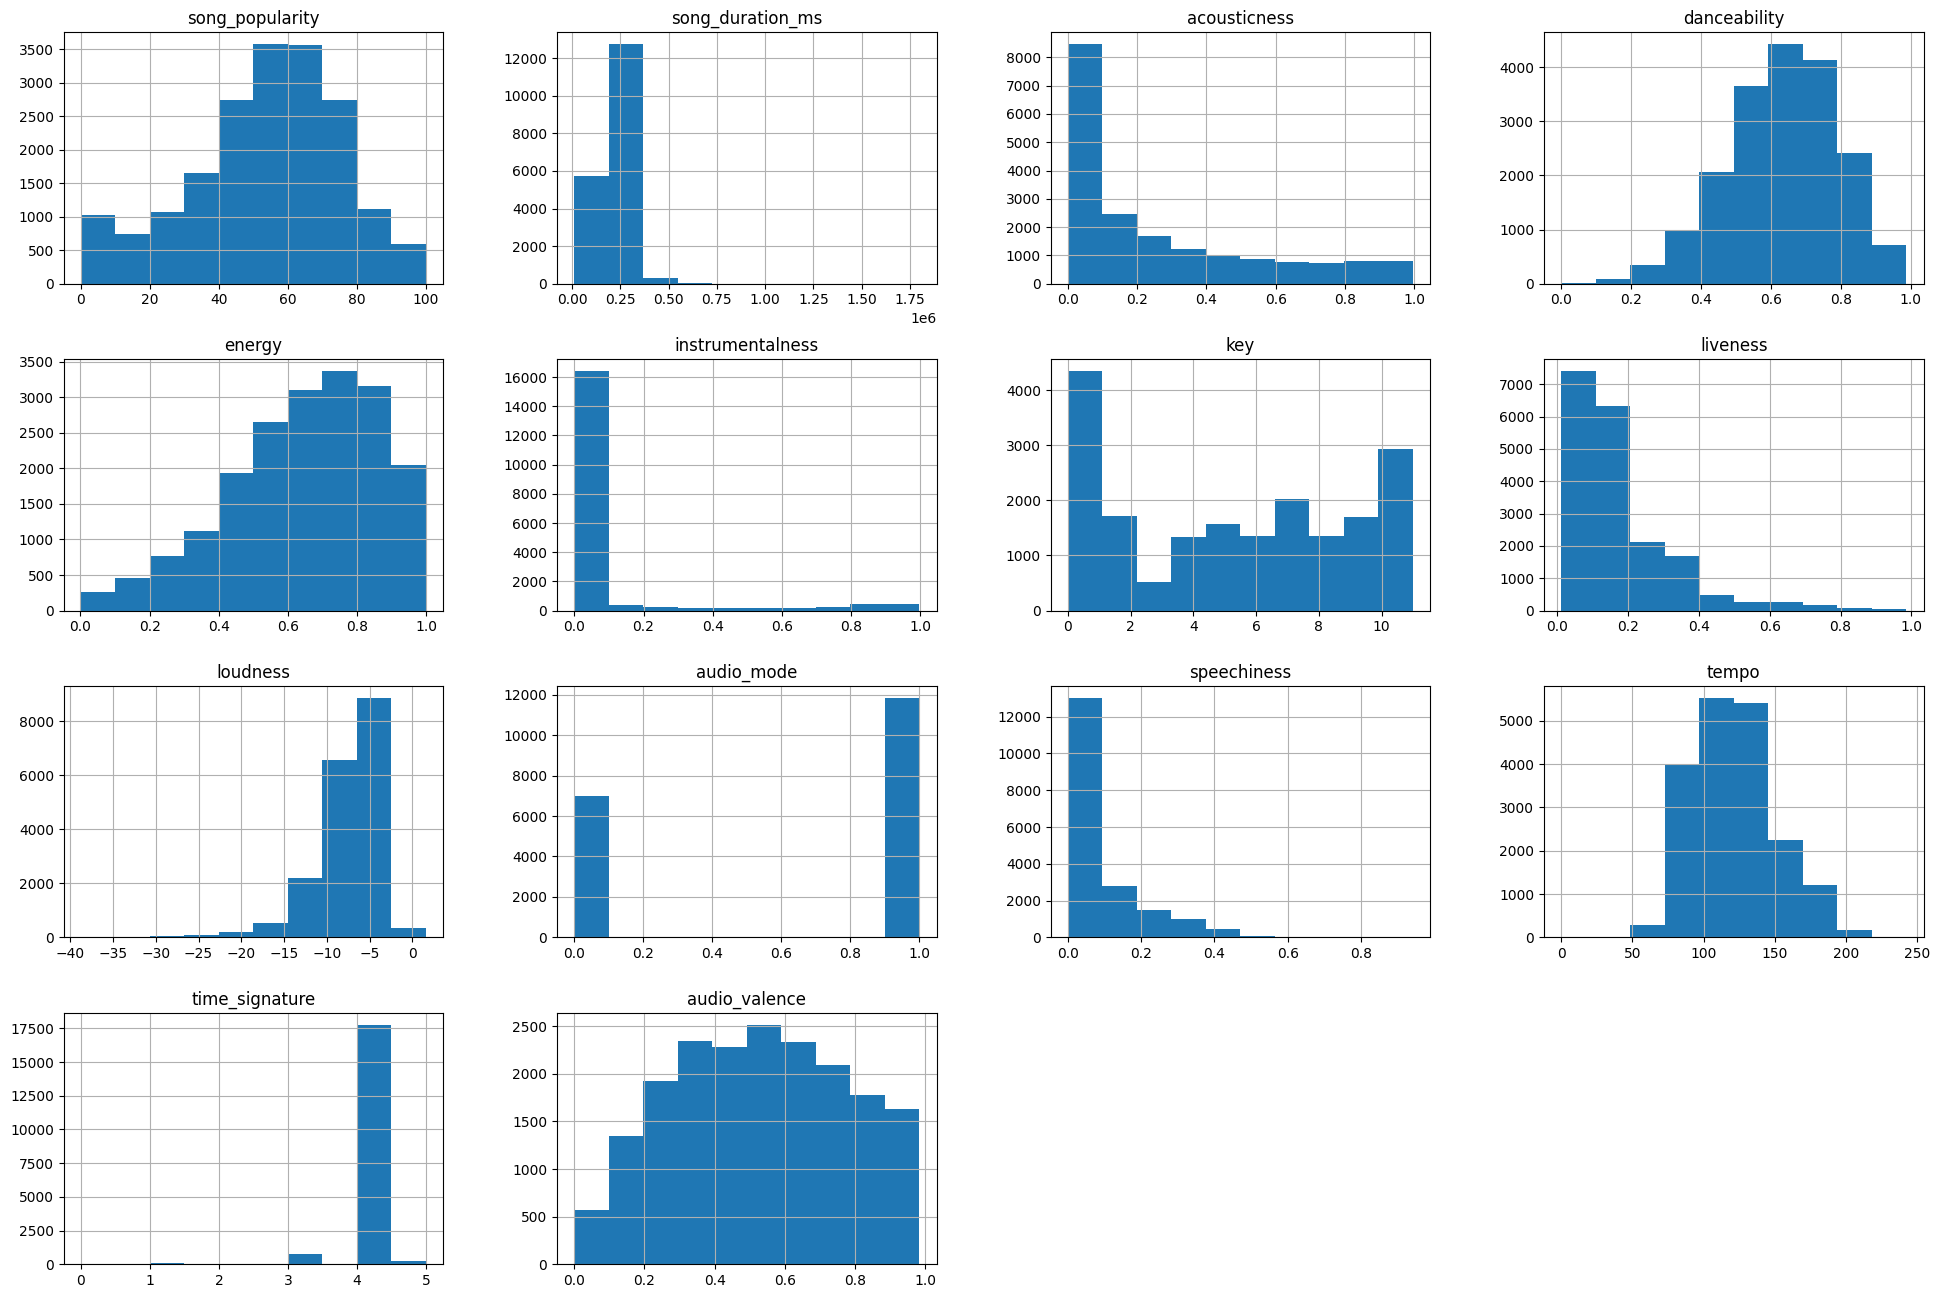

In [327]:
# View distribution of data with histograms
songs.hist(figsize=(24, 16))
plt.show()

##### Checking for correlation between every attribute using pearsons coefficient

In [328]:
corr_matrix = songs.corr(numeric_only=True)
corr_matrix

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558


##### Lets check which values most correlate with our target

In [329]:
corr_matrix["song_popularity"].sort_values(ascending=False)

song_popularity     1.000000
danceability        0.104290
loudness            0.099442
time_signature      0.034983
speechiness         0.021479
energy              0.001365
audio_mode         -0.004969
key                -0.013160
song_duration_ms   -0.018899
tempo              -0.022672
liveness           -0.038937
audio_valence      -0.052895
acousticness       -0.065181
instrumentalness   -0.130907
Name: song_popularity, dtype: float64

There is little positive correlation with the target and 'danceability'.
Some negative correlation with target and 'instrumentalness'.
Lets plot these.

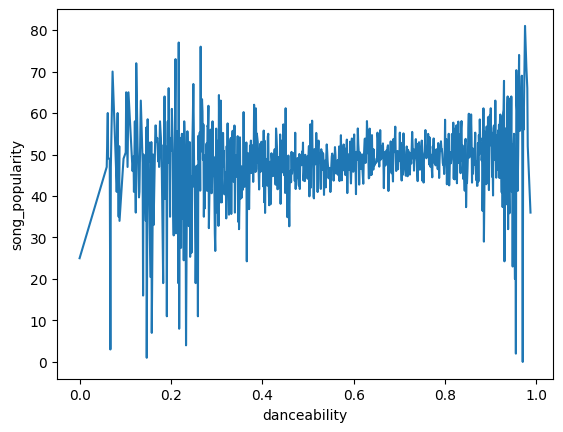

In [363]:
#line plot of song_popularity vs. danceability
g = sns.lineplot(x="danceability", y="song_popularity", data=songs, errorbar=None)

Text(0, 0.5, 'song_popularity')

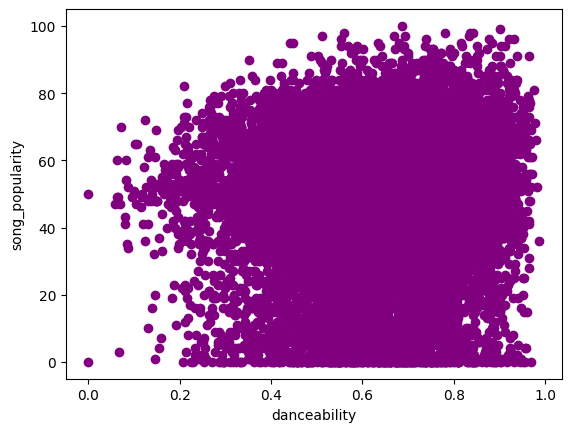

In [364]:
# Scatterplot for song_popularity vs danceability

# define x and y values
X = songs["danceability"]
y = songs["song_popularity"]

# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'purple')
plt.xlabel("danceability")
plt.ylabel("song_popularity")

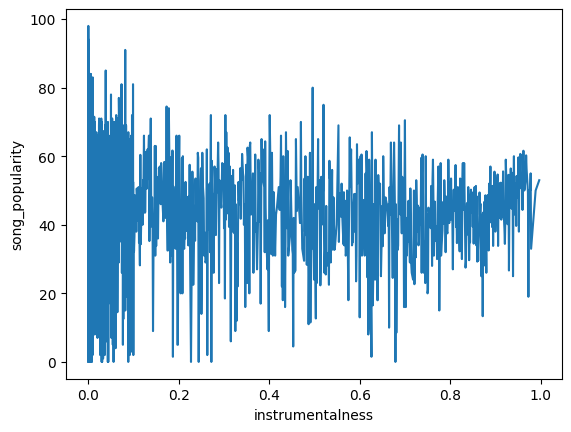

In [365]:
#line plot of song_popularity vs. instrumentalness
g = sns.lineplot(x="instrumentalness", y="song_popularity", data=songs, errorbar=None)

Text(0, 0.5, 'song_popularity')

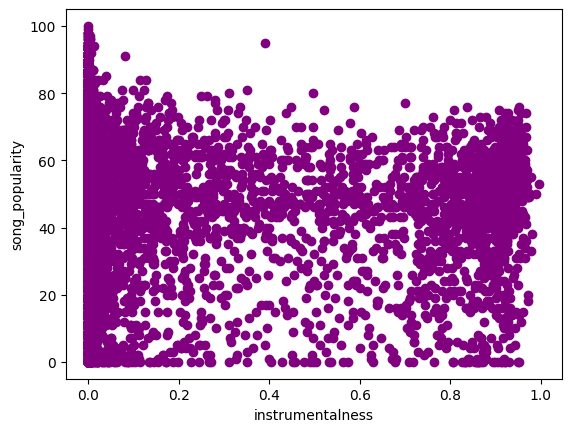

In [366]:
# Scatterplot for song_popularity vs danceability

# define x and y values
X = songs["instrumentalness"]
y = songs["song_popularity"]

# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'purple')
plt.xlabel("instrumentalness")
plt.ylabel("song_popularity")

# Preparing the data

In [332]:
# Check for duplicate rows and display them
songs[(songs.duplicated())]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
173,Sex on Fire,81,203346,0.00172,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374
179,Use Somebody,79,230760,0.00552,0.276,0.715,0.000417,0,0.2010,-5.356,1,0.0432,137.028,4,0.173
212,Hips Don't Lie,84,218093,0.28400,0.778,0.824,0.000000,10,0.4050,-5.892,0,0.0712,100.024,4,0.756
414,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.0270,147.125,4,0.609
421,Me and Bobby McGee,69,271333,0.30200,0.453,0.464,0.000060,2,0.1520,-10.960,1,0.0431,93.190,4,0.658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,The Time I've Wasted,63,213249,0.79600,0.473,0.250,0.000088,5,0.1010,-11.263,1,0.0304,145.027,4,0.261
18811,Oceans,69,216186,0.27400,0.404,0.480,0.000009,9,0.1320,-8.906,0,0.0303,129.162,3,0.200
18817,Life Is Confusing,64,171413,0.95500,0.373,0.216,0.001050,1,0.0739,-11.410,1,0.0326,129.030,4,0.496
18826,Call It Dreaming,67,231760,0.61000,0.519,0.515,0.000057,5,0.1070,-9.448,1,0.0310,80.329,4,0.714


##### There are 3909 duplicate rows. We will now remove them.

In [333]:
# Remove duplicated rows in songs data
songs.drop_duplicates(inplace=True)

##### Check for missing values

In [334]:
# If no key was detected, the value is -1. check for missing key.
count = songs['key'].value_counts().get(-1, 0)
count

0

In [335]:
# Find the number of null values in each column
songs.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

##### time_signature attribute seems to be largely "4", lets take a look.

In [336]:
# Count the occurrences of 4s in time_signature
value_count = songs['time_signature'].value_counts().get(4, 0)

# Calculate the percentage
percentage = (value_count / len(songs['time_signature'])) * 100
print(percentage)

93.64196703738443


In [337]:
# Drop time signature attribute
songs = songs.drop('time_signature', axis=1)

#song_name is of no use for prediction so drop as well
songs = songs.drop('song_name', axis=1)

#drop energy for high correlation
songs = songs.drop('energy', axis = 1)

##### Encode and scale the columns

In [338]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [339]:
# defining the categorical and numerical columns. the numerical ones happen to be all float
cat_cols=['key', 'audio_mode']
num_cols = songs.select_dtypes(include='float').columns.to_list()
num_cols.append('song_duration_ms')

print(cat_cols)
print(num_cols)

# define what preprocessing we want to do
cat_preprocessor = OneHotEncoder()
num_preprocessor = StandardScaler()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_preprocessor, cat_cols),  # apply OneHotEncoder to categorical columns
        ('num', num_preprocessor, num_cols)],  # apply StandardScaler to numerical columns
        remainder = 'passthrough')

preprocessor

['key', 'audio_mode']
['acousticness', 'danceability', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence', 'song_duration_ms']


ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(), ['key', 'audio_mode']),
                                ('num', StandardScaler(),
                                 ['acousticness', 'danceability',
                                  'instrumentalness', 'liveness', 'loudness',
                                  'speechiness', 'tempo', 'audio_valence',
                                  'song_duration_ms'])])

In [340]:
# apply the preprocessing to the original data and save it to a new dataframe
songs_prepared = preprocessor.fit_transform(songs)

# add back column headers
feature_names = preprocessor.get_feature_names_out()
songs_prepared = pd.DataFrame(data=songs_prepared, columns=feature_names)

<Axes: >

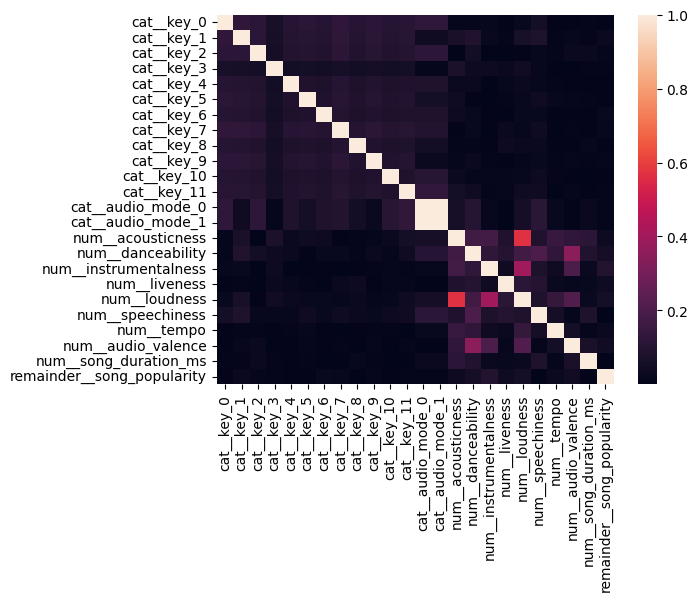

In [341]:
# display new correlations with a heatmap
corr = songs_prepared.corr().abs()
sns.heatmap(corr)


We can now see that all of the keys have zero correlation with the song popularity

In [342]:
for i in range(12):
    songs_prepared = songs_prepared.drop(f'cat__key_{i}', axis=1)

#### Split the dataset into a training dataset (80%) and testing dataset.

In [343]:
from sklearn.model_selection import train_test_split

#dataframe containing all features but target aka. feature matrix
X = songs_prepared.drop(["remainder__song_popularity"], axis=1)

#target variable vector
y = songs_prepared["remainder__song_popularity"]

#split the data into train and test set based on the above arguments, with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11940, 11) (11940,) (2986, 11) (2986,)


## Testing 3 different regression models

Model 1: Polynomial Regression with degree 2

In [344]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2)

X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

train and test the model

In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2s

pr_model = LinearRegression()
pr_model.fit(X_train_poly, y_train)

pr_y_pred = pr_model.predict(X_test_poly)

#calculate metrics
pr_mse = mse(y_test, pr_y_pred)
pr_rmse = np.sqrt(pr_mse)
pr_mae = mae(y_test, pr_y_pred)
pr_r2s = r2s(y_test, pr_y_pred)
print(pr_mse, pr_rmse, pr_mae, pr_r2s)

391.34717826689956 19.782496765244257 15.65609628788513 0.04704438530715016


k-fold cross validation

In [346]:
from sklearn.model_selection import cross_val_score

# perform k-fold cross-validation
k = 5  # mumber of folds
mse_scores = cross_val_score(lr_model, X_train_poly, y_train, cv=k, scoring='neg_mean_squared_error')

# mean MSE across folds
mean_mse = np.mean(mse_scores)

print("Mean MSE:", -mean_mse)
print("k fols MSEs :", mse_scores)


Mean MSE: 399.54650785790216
k fols MSEs : [-390.95031935 -398.54683257 -402.61270405 -400.36258646 -405.26009686]


Model 2: Elastic net (Ridge + Lasso) because we have alot of features that may be useless

Find the best hyperparemeters using grid search

In [347]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

#define gris of which hyperparameters to search
enr_param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9] #weight of Lasso penalty
}

#Elastic-Net regression model
enr = ElasticNet()

#grid search to find the best hyperparameters for enr with 5 fold cross validation
enr_grid_search = GridSearchCV(estimator = enr, param_grid=enr_param_grid, cv=5, scoring = 'neg_mean_squared_error')

#train the model
enr_grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", enr_grid_search.best_params_)


Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.1}


In [348]:
#predict with the fine tuned elastic-net regression model
enr = enr_grid_search.best_estimator_
enr_pred = enr.predict(X_test)

enr_mse = mse(y_test, enr_pred)
enr_rmse = np.sqrt(enr_mse)
enr_mae = mae(y_test, enr_pred)
enr_r2s = r2s(y_test, enr_pred)

support vector regression with fine tuned hyperparameters

In [349]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

#define gris of which hyperparameters to search
svr_param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.01, 0.1, 1 , 10],
    'epsilon': [0.01, 0.1, 0.2]
}

svr_model = SVR()

svr_grid_search = RandomizedSearchCV(estimator=svr_model, param_distributions=svr_param_grid, n_iter=10, cv=5, 
scoring='neg_mean_squared_error', random_state=42)
svr_grid_search.fit(X_train, y_train)

print(svr_grid_search.best_params_)

{'kernel': 'rbf', 'epsilon': 0.2, 'C': 1}


In [350]:
svr_model = svr_grid_search.best_estimator_
svr_y_pred = svr_model.predict(X_test)

svr_mse = mse(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mae(y_test, svr_y_pred)
svr_r2s = r2s(y_test, svr_y_pred)

gradient boosting

In [351]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

gb_model = GBR(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

gb_mse = mse(y_test, gb_pred)
gb_mae = mae(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2s(y_test, gb_pred)


print("Mean Squared Error:", gb_mse, "Mean abs Error:", gb_mae, "r2:", gb_r2)

Mean Squared Error: 392.86127740039774 Mean abs Error: 15.71588587423131 r2: 0.043357456281985174


## Compare the models

In [352]:
from sklearn.metrics import accuracy_score

In [361]:
# Create a table to show metrics of all 3 models.
# Metrics include Mean squared error, root mean squared error, mean absolute error, and r2 score
mse  = [pr_mse, enr_mse, svr_mse]
rmse = [pr_rmse, enr_rmse, svr_rmse]
mae  = [pr_mae, enr_mae, svr_mae]
rscores = [pr_r2s, enr_r2s, svr_r2s]

metrics = pd.DataFrame({
    'mse': mse,
    'rmse': rmse,
    'mae': mae,
    'r2 scores': rscores
}, index=['Polynomial', 'Elastic-Net', 'Support Vector'])

metrics

,mse,rmse,mae,r2 scores
Polynomial,391.347178,19.782497,15.656096,0.047044
Elastic-Net,403.419279,20.085300,15.976842,0.017648
Support Vector,402.989177,20.074590,15.403766,0.018695


#### We see that polynomial regression gives us the best results

<Axes: xlabel='svr_predicted', ylabel='actual'>

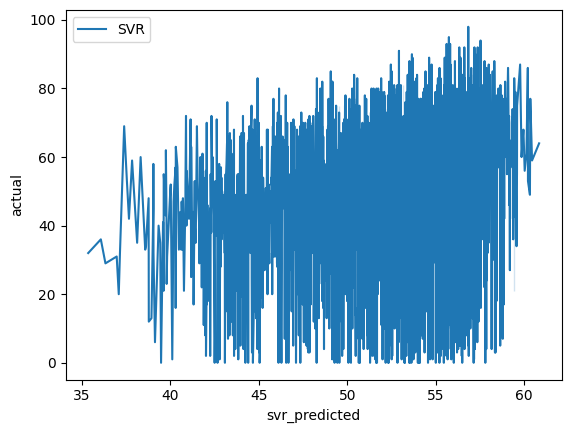

In [354]:
df = pd.DataFrame({
    'svr_predicted': svr_y_pred, 
    'enr_predicted': enr_pred,
    'pr_predicted' : pr_y_pred,
    'actual': y_test})

sns.lineplot(data=df, x='svr_predicted', y='actual', label='SVR')

<Axes: xlabel='enr_predicted', ylabel='actual'>

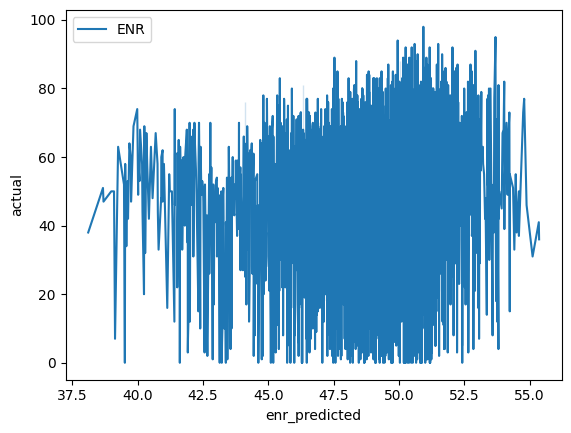

In [355]:
sns.lineplot(data=df, x='enr_predicted', y='actual', label='ENR')

<Axes: xlabel='pr_predicted', ylabel='actual'>

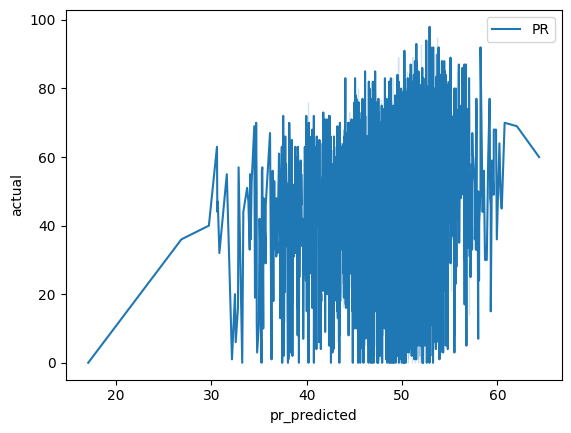

In [362]:
sns.lineplot(data=df, x='pr_predicted', y='actual', label='PR')